# Task - 2

## Unsupervised Machine Learning

### Author : Sandeep Pasumarthi

### Project : To segment the given data of flower dimensions into optimum no. of clusters

### Project Description : Using clustering techniques, our target is to predict the optimum number of clusters and
### represent it visually.

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Data Set

data = pd.read_csv('Iris.csv')
data.shape

(150, 6)

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Total Description of Data

data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,150,NaN,NaN,NaN,75.5,43.4454,1,38.25,75.5,112.75,150
SepalLengthCm,150,NaN,NaN,NaN,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
PetalLengthCm,150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
PetalWidthCm,150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-versicolor,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data = data.drop('Id', axis = 1)

### Predicting Optimum Number of Clusters

In [7]:
features = data.iloc[:, [0, 1, 2, 3]].values

wcss = []

from sklearn.cluster import KMeans

for i in range(1, 10):
    k_mean = KMeans(n_clusters = i, init = 'k-means++', max_iter = 200, random_state = 17)
    k_mean.fit(features)
    wcss.append(k_mean.inertia_)

### Visualising The Elbow Curve

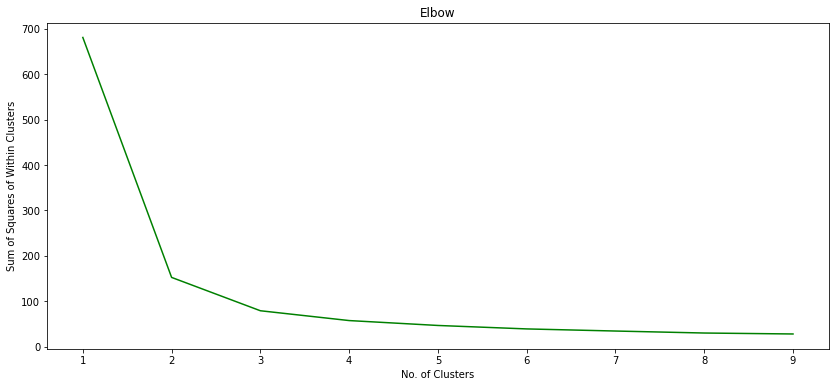

In [8]:
plt.figure(figsize = (14, 6))
plt.plot(range(1, 10), wcss, color = 'green')
plt.title('Elbow')
plt.xlabel('No. of Clusters')
plt.ylabel('Sum of Squares of Within Clusters')
plt.show()

From the above elbow curve, we can say that '3' is the optimal number of clusters

### Model Creation Training

In [9]:
k_means = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, random_state = 17)
y_kmeans = k_means.fit_predict(features)

### Visualising The Results of Model Prediction

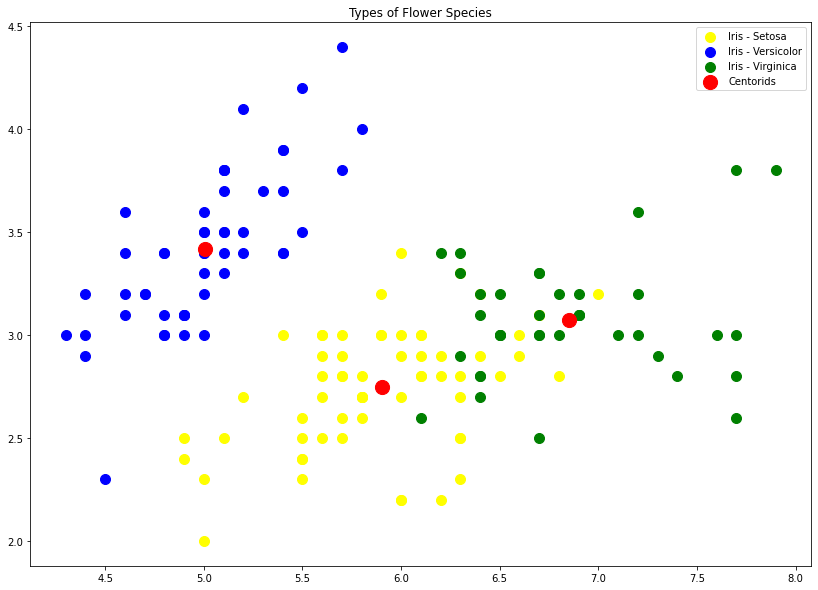

In [10]:
plt.figure(figsize = (14, 10))
plt.scatter(features[y_kmeans == 0, 0], features[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Iris - Setosa')
plt.scatter(features[y_kmeans == 1, 0], features[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris - Versicolor')
plt.scatter(features[y_kmeans == 2, 0], features[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris - Virginica')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 200, c = 'red', label = 'Centorids')

plt.title('Types of Flower Species')
plt.legend()
plt.show()

It seems it is a very good prediction on given data set.

## Thank You